In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
import numpy as np
import os
import cv2

In [28]:
file_path = 'D:/Automatic/SRTP/GAN/datasets/face'
file_list = os.listdir(file_path)

In [36]:
image_list=[]
rate = 0.1
for name in file_list:
    img = imgplt.imread('{}/{}'.format(file_path, name))
    height, width = img.shape[:2]
    size = (int(width*rate), int(height*rate))
    img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
    image_list.append(img)

(51, 51, 3)

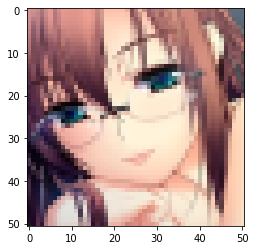

In [38]:
plt.imshow(image_list[0])
image_list[0].shape

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
import numpy as np
import os
import cv2

class face_dataset():
    def __init__(self, file_path = 'D:/Automatic/SRTP/GAN/datasets/face', rate=1.0):
        image_list=[]
        self.rate = rate
        self.file_list = os.listdir(file_path)
    def generator(self):
        for name in self.file_list:
            img = imgplt.imread('{}/{}'.format(file_path, name))
            height, width = img.shape[:2]
            size = (int(width*self.rate), int(height*self.rate))
            img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
            yield img
    def parse(self, x):
        x = tf.cast(x, tf.float32)
        x = x/255 * 2 - 1
        return x
    def get_train_dataset(self):
        train = tf.data.Dataset.from_generator(self.generator, output_types=tf.int64)
        train = train.map(self.parse).shuffle(1000).batch(128)
        return train

In [53]:
dataset = face_dataset()
train = dataset.get_train_dataset()

In [54]:
train

<DatasetV1Adapter shapes: <unknown>, types: tf.float32>

In [55]:
pic = next(iter(train))
pic.shape

TensorShape([128, 512, 512, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


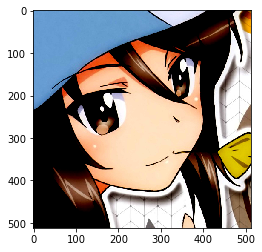

In [56]:
plt.imshow(pic[0].numpy())